In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

In [2]:
df_basic_release = pd.read_csv('../independent_metrics/basic_release.csv', index_col='bug_id')
df_basic_beta = pd.read_csv('../independent_metrics/basic_beta.csv', index_col='bug_id')
df_basic_aurora = pd.read_csv('../independent_metrics/basic_aurora.csv', index_col='bug_id')

df_bug_inducing = pd.read_csv('../independent_metrics/bug_inducing.csv', index_col='bug_id')

df_release = pd.merge(df_basic_release, df_bug_inducing, left_index=True, right_index=True)
df_beta = pd.merge(df_basic_beta, df_bug_inducing, left_index=True, right_index=True)
df_aurora = pd.merge(df_basic_aurora, df_bug_inducing, left_index=True, right_index=True)

In [3]:
df_release.shape

(318, 31)

In [4]:
df_beta.shape

(2700, 31)

In [5]:
df_aurora.shape

(4557, 31)

In [6]:
df_release.component = df_release.component.apply(lambda x: x.split(':')[0])
df_beta.component = df_beta.component.apply(lambda x: x.split(':')[0])
df_aurora.component = df_aurora.component.apply(lambda x: x.split(':')[0])

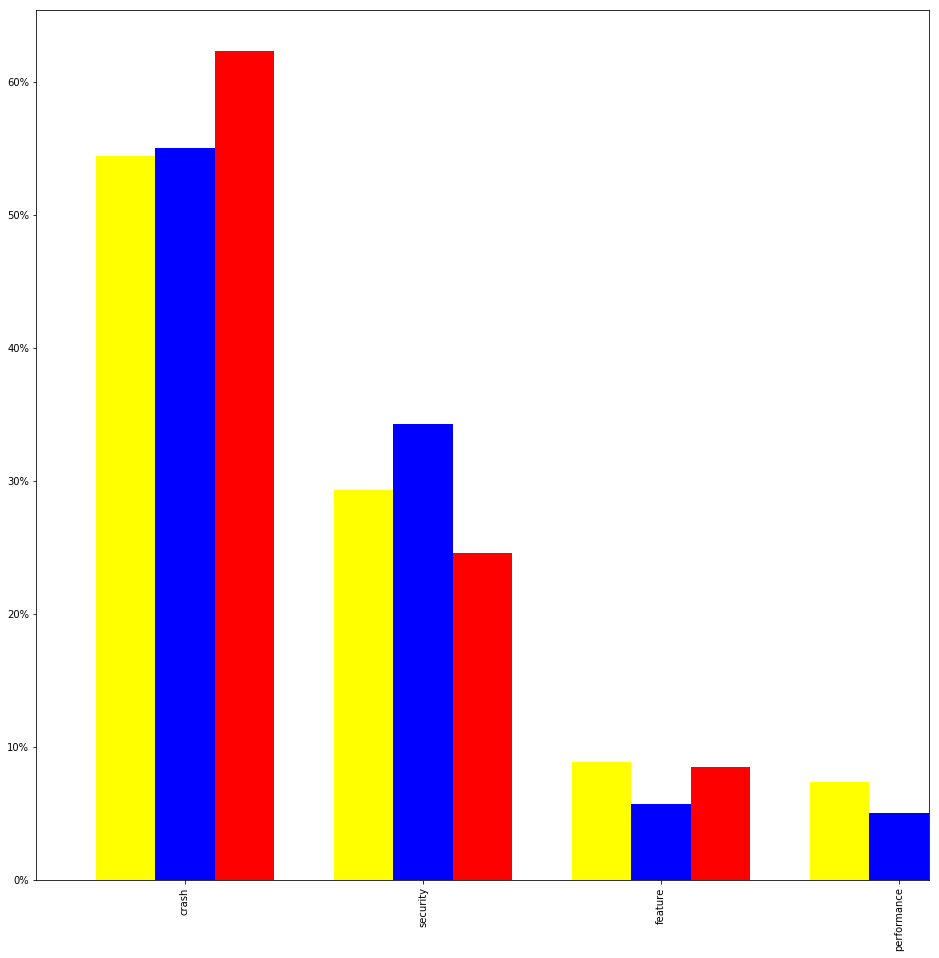

In [7]:
types_approved_release = df_release[df_release['uplift_accepted'] == True].types.str.split('^').apply(pd.Series, 1).stack()
types_approved_release.index = types_approved_release.index.droplevel(-1)
types_approved_release.name = 'Type'
types_approved_beta = df_beta[df_beta['uplift_accepted'] == True].types.str.split('^').apply(pd.Series, 1).stack()
types_approved_beta.index = types_approved_beta.index.droplevel(-1)
types_approved_beta.name = 'Type'
types_approved_aurora = df_aurora[df_aurora['uplift_accepted'] == True].types.str.split('^').apply(pd.Series, 1).stack()
types_approved_aurora.index = types_approved_aurora.index.droplevel(-1)
types_approved_aurora.name = 'Type'

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
types_approved_release.value_counts(normalize=True).plot(kind='bar', color="red", ax=ax, position=-0.5, width=0.25)
types_approved_beta.value_counts(normalize=True).plot(kind='bar', color="blue", ax=ax, position=0.5, width=0.25)
types_approved_aurora.value_counts(normalize=True).plot(kind='bar', color="yellow", ax=ax, position=1.5, width=0.25)
plt.show()

## Release uplifts

### Approved vs rejected uplifts per component

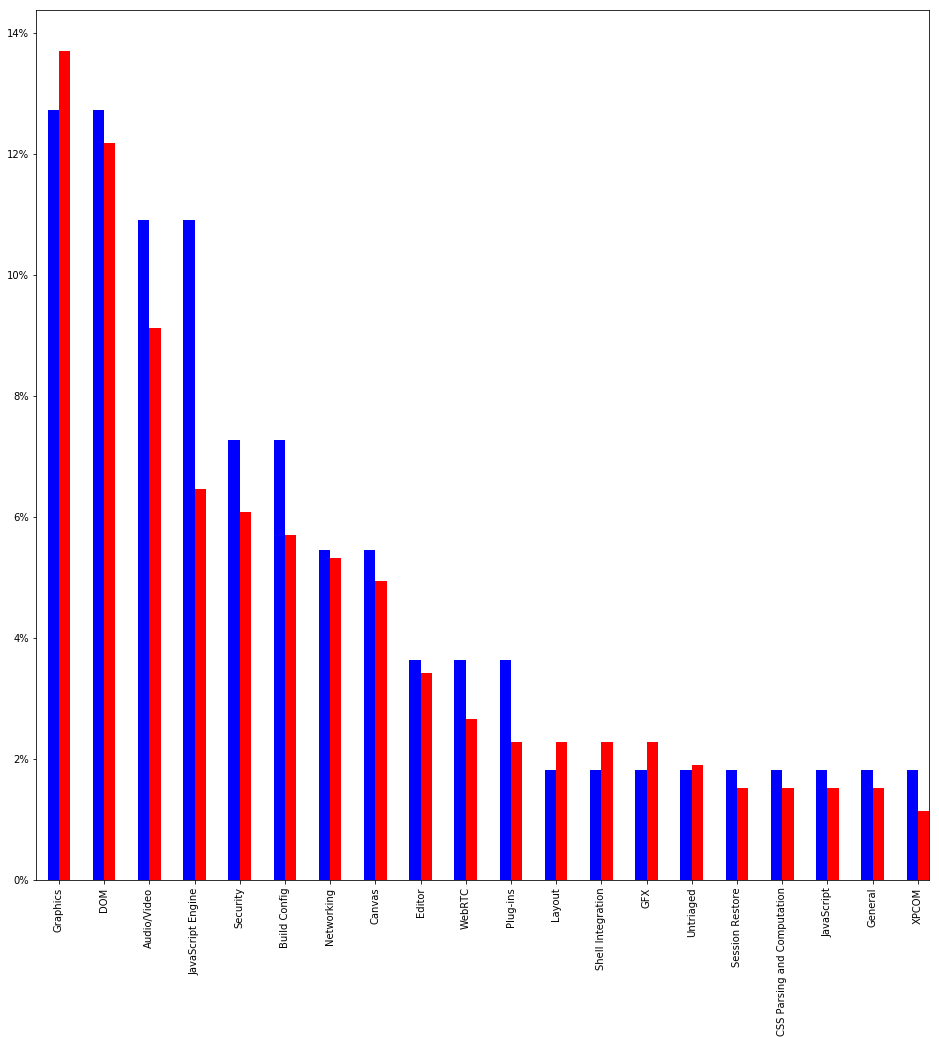

In [8]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
df_release[df_release['uplift_accepted'] == True].component.value_counts(normalize=True).plot(kind='bar', color="red", ax=ax, position=0, width=0.25)
df_release[df_release['uplift_accepted'] == False].component.value_counts(normalize=True).plot(kind='bar', color="blue", ax=ax, position=1, width=0.25)
plt.show()

### Approved vs rejected uplifts per bug type

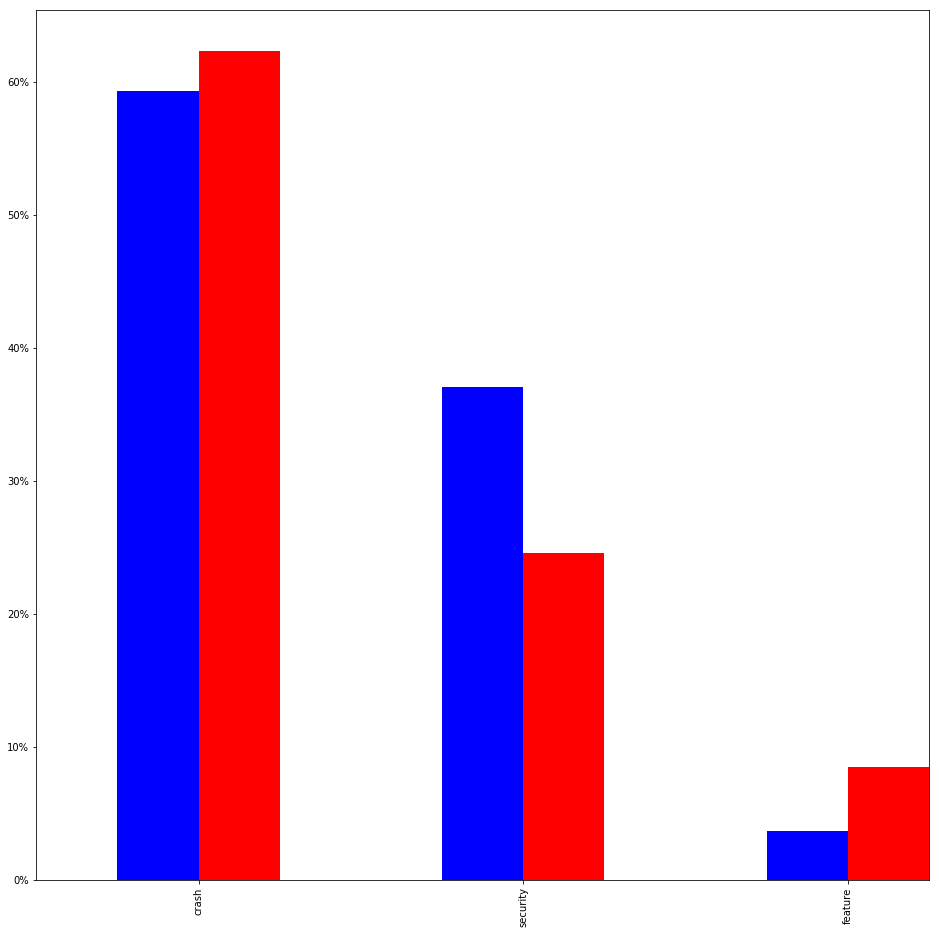

In [9]:
types_approved = df_release[df_release['uplift_accepted'] == True].types.str.split('^').apply(pd.Series, 1).stack()
types_approved.index = types_approved.index.droplevel(-1)
types_approved.name = 'Type'
types_rejected = df_release[df_release['uplift_accepted'] == False].types.str.split('^').apply(pd.Series, 1).stack()
types_rejected.index = types_rejected.index.droplevel(-1)
types_rejected.name = 'Type'

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
types_approved.value_counts(normalize=True).plot(kind='bar', color="red", ax=ax, position=0, width=0.25)
types_rejected.value_counts(normalize=True).plot(kind='bar', color="blue", ax=ax, position=1, width=0.25)
plt.show()

## Beta uplifts

### Approved vs rejected uplifts per component

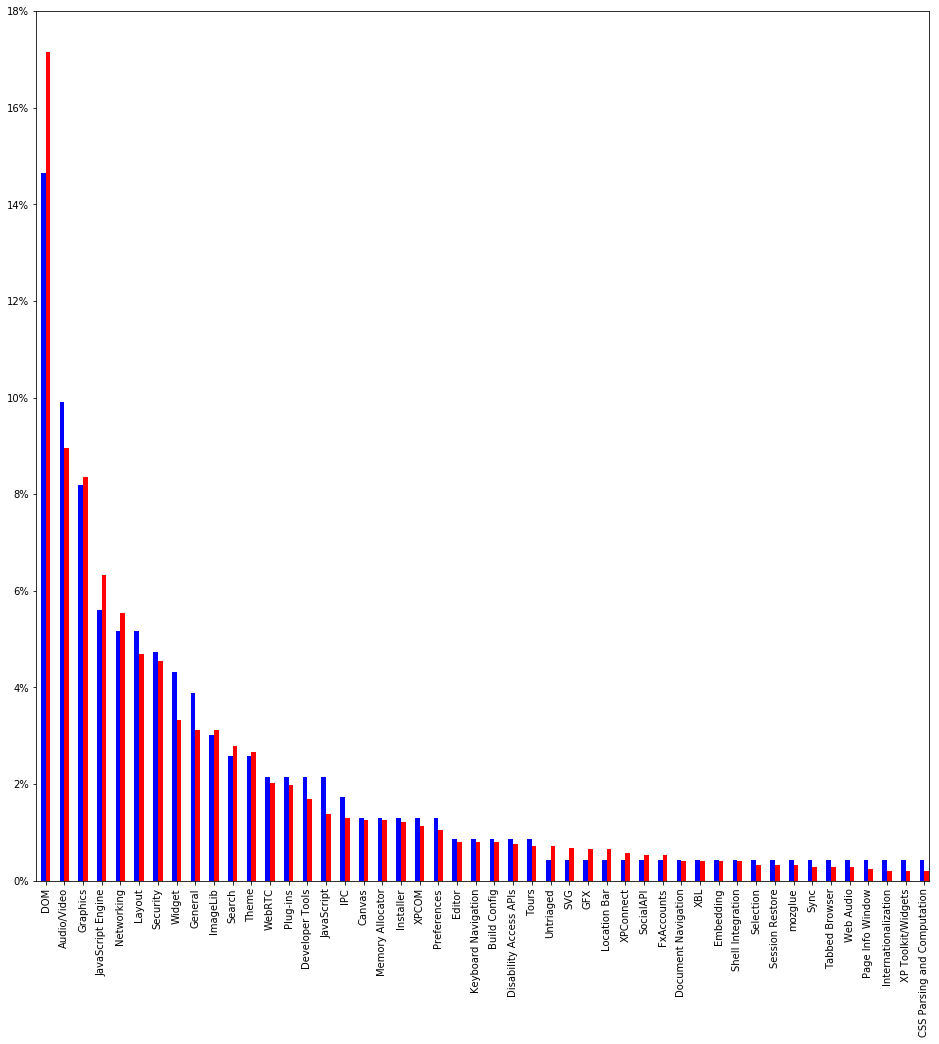

In [10]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
df_beta[df_beta['uplift_accepted'] == True].component.value_counts(normalize=True).plot(kind='bar', color="red", ax=ax, position=0, width=0.25)
df_beta[df_beta['uplift_accepted'] == False].component.value_counts(normalize=True).plot(kind='bar', color="blue", ax=ax, position=1, width=0.25)
plt.show()

### Approved vs rejected uplifts per bug type

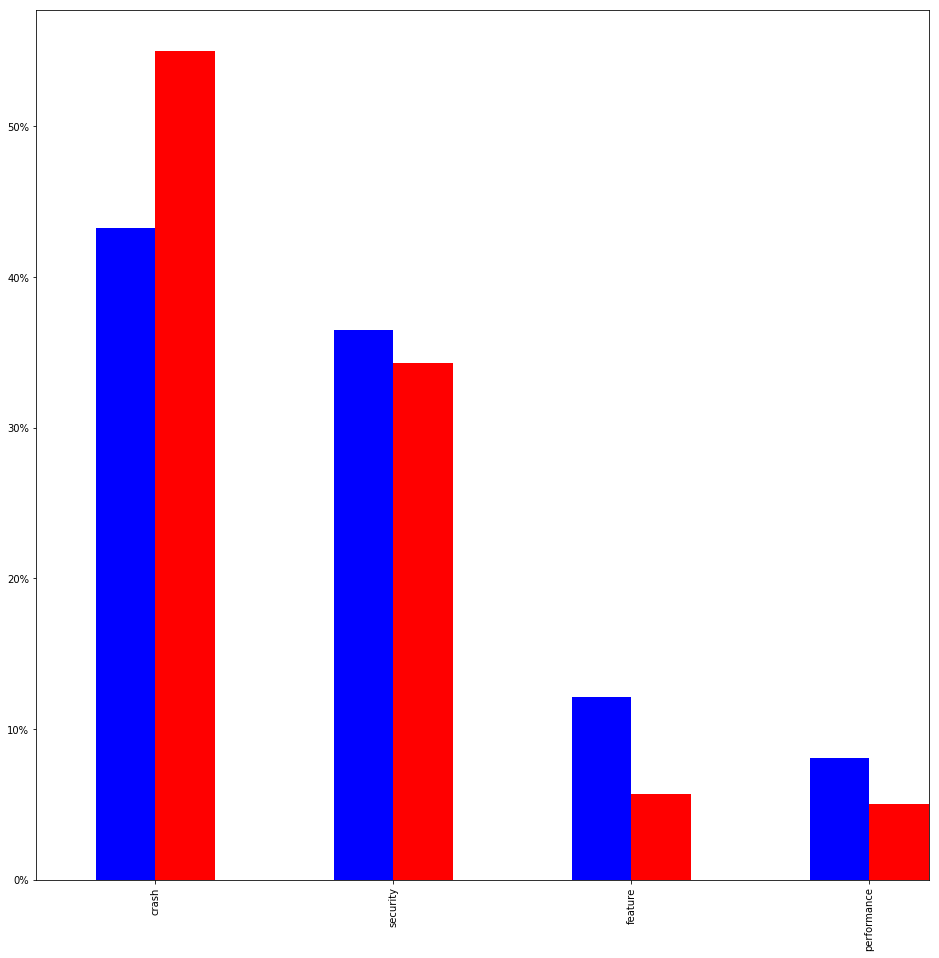

In [11]:
types_approved = df_beta[df_beta['uplift_accepted'] == True].types.str.split('^').apply(pd.Series, 1).stack()
types_approved.index = types_approved.index.droplevel(-1)
types_approved.name = 'Type'
types_rejected = df_beta[df_beta['uplift_accepted'] == False].types.str.split('^').apply(pd.Series, 1).stack()
types_rejected.index = types_rejected.index.droplevel(-1)
types_rejected.name = 'Type'

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
types_approved.value_counts(normalize=True).plot(kind='bar', color="red", ax=ax, position=0, width=0.25)
types_rejected.value_counts(normalize=True).plot(kind='bar', color="blue", ax=ax, position=1, width=0.25)
plt.show()

## Aurora uplifts

### Approved vs rejected uplifts per component

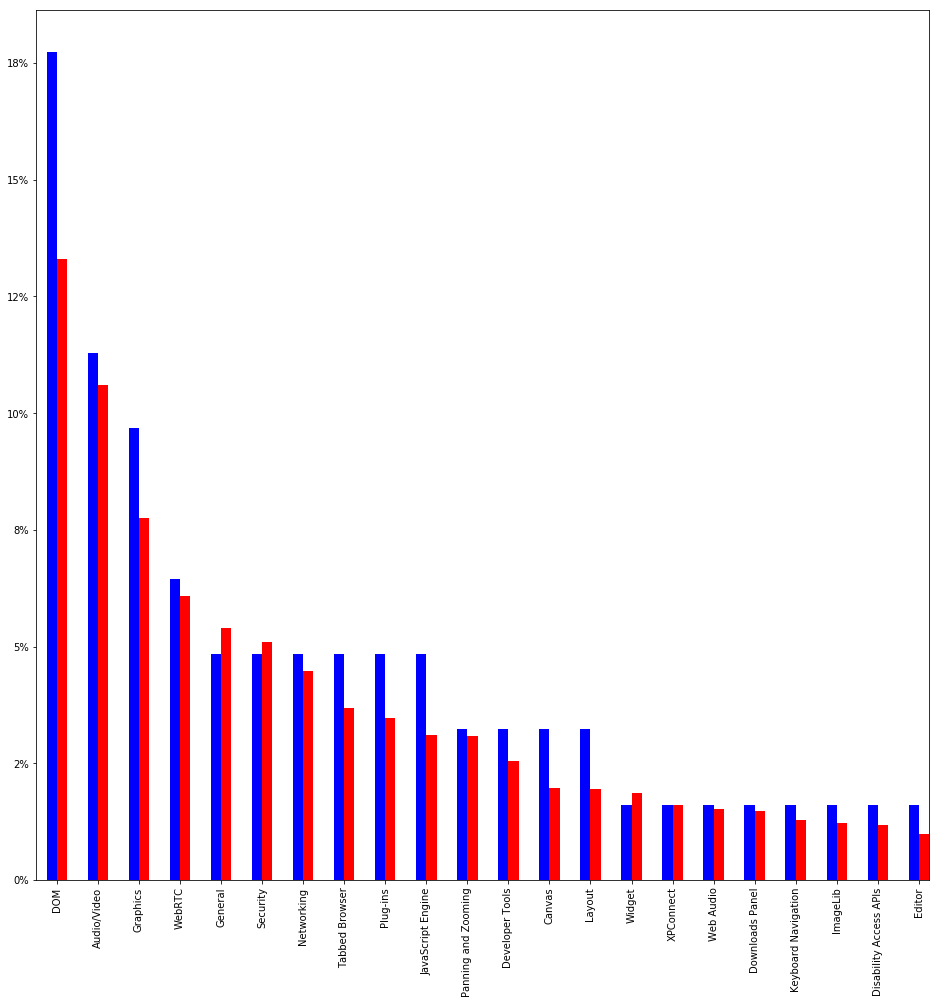

In [12]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
df_aurora[df_aurora['uplift_accepted'] == True].component.value_counts(normalize=True).plot(kind='bar', color="red", ax=ax, position=0, width=0.25)
df_aurora[df_aurora['uplift_accepted'] == False].component.value_counts(normalize=True).plot(kind='bar', color="blue", ax=ax, position=1, width=0.25)
plt.show()

### Approved vs rejected uplifts per bug type

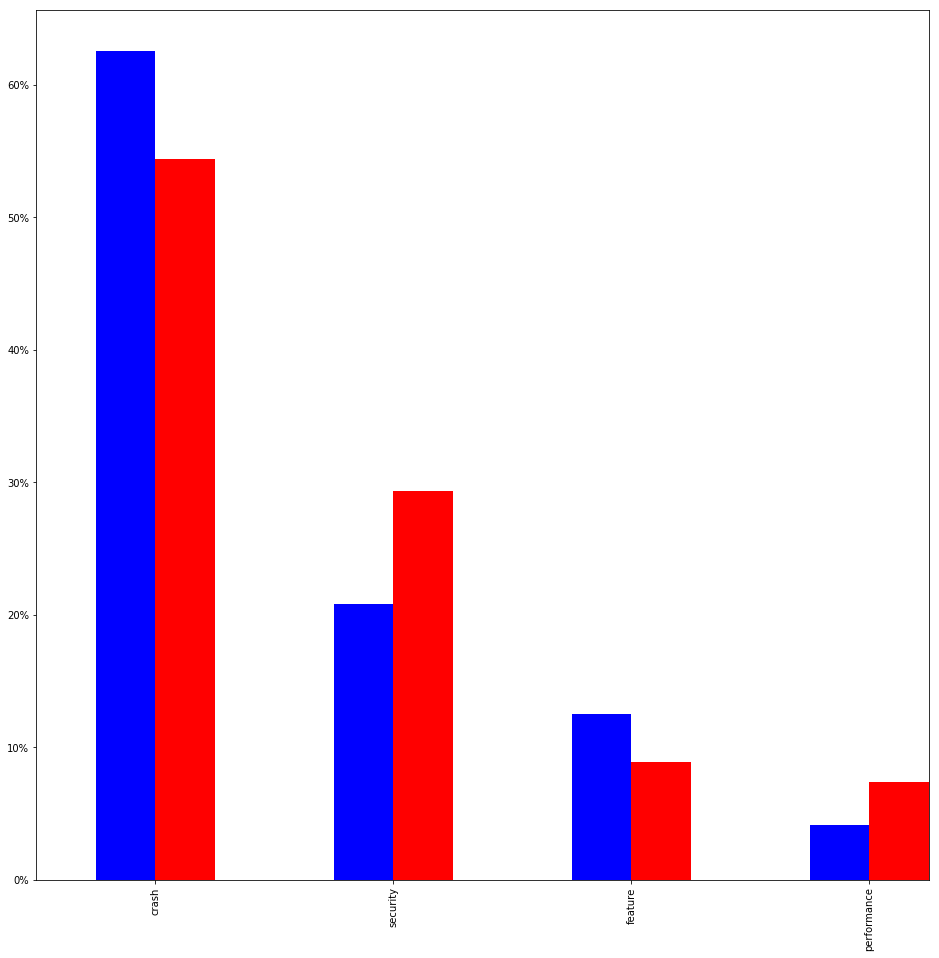

In [13]:
types_approved = df_aurora[df_aurora['uplift_accepted'] == True].types.str.split('^').apply(pd.Series, 1).stack()
types_approved.index = types_approved.index.droplevel(-1)
types_approved.name = 'Type'
types_rejected = df_aurora[df_aurora['uplift_accepted'] == False].types.str.split('^').apply(pd.Series, 1).stack()
types_rejected.index = types_rejected.index.droplevel(-1)
types_rejected.name = 'Type'

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
types_approved.value_counts(normalize=True).plot(kind='bar', color="red", ax=ax, position=0, width=0.25)
types_rejected.value_counts(normalize=True).plot(kind='bar', color="blue", ax=ax, position=1, width=0.25)
plt.show()